<h1>CNN modeli za prepoznavanje šalica</h1>
<hr/>
<h2>Model CHarlie</h2>
<p>Testovi sa promjenom kompleksnosti modela</p>
<p> Set slika vraćen na 700/100, smanjivanje broja konvolucijskih slojeva</p>

<p>Uvoženje potrebnih modula:</p>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


<p>Postavljanje direktorija sa trening i validacijskim slikama:</p>

In [6]:
# Postavi direktorije slika
train_dir = "../Projekt_slike_128/Trening"
test_dir = "../Projekt_slike_128/Validacija"

<p>Odabir broja epoha i veličine batch-eva:</p>

In [23]:
# Odredi broj epoha i veličinu batcheva
num_of_epochs = input("Number of epochs:")
num_of_epochs = int(num_of_epochs)
size_of_batch = input("Batch size:")
size_of_batch = int(size_of_batch)

Number of epochs: 50
Batch size: 64


<p>Generiranje podataka:</p>

In [24]:
# Generatori podataka
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)

Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


<p>Prikaz slika iz svake klase: </p>

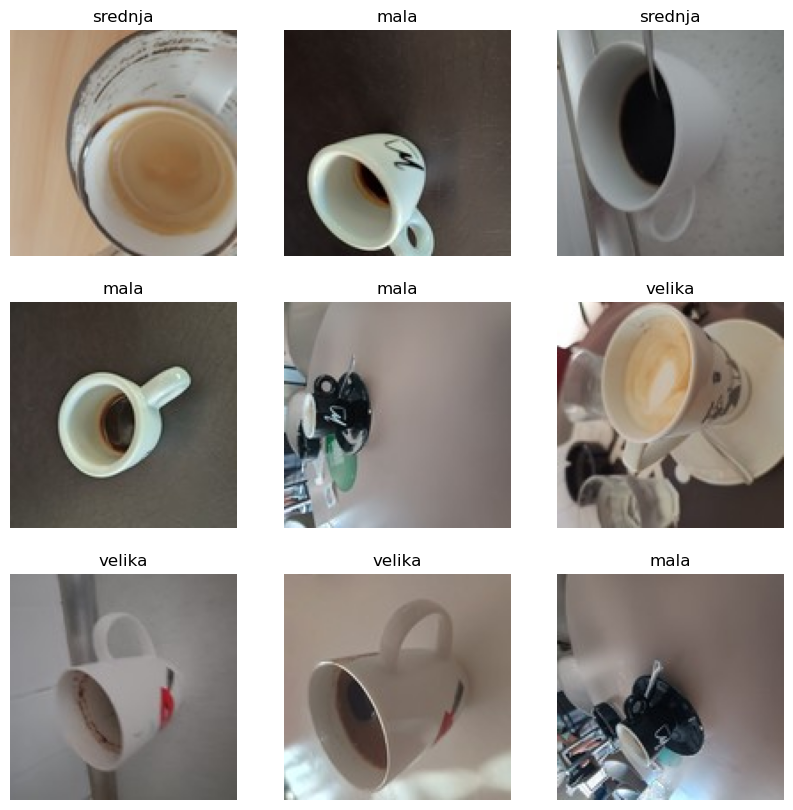

In [25]:
# Primjeri slika
def display_sample_images(generator):
    x, y = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        
        if (np.argmax(y[i])==0):
            plt.title("mala")
        if (np.argmax(y[i])==1):
            plt.title("srednja")
        if (np.argmax(y[i])==2):
            plt.title("velika")
        plt.axis("off")
    plt.show()


display_sample_images(train_generator)


<p>Jednostavnosti radi, veličine šalica nazvanje su mala, srednja i velika.
Srednja šalica je "velika šalica za crnu kavu", a velika šalica je "šalica za bijelu kavu".</p>

<hr/>
<p>Izgradnja osnovnog (pojednostavljenog!) CNN modela za prepoznavanje šalica:</p>

<h2>MOdel C.1</h2>
<p>u odnosu na "osnovni model" skinut je jedan konvolucijski sloj (128) </p>
<p> broj parametara smanjena sa preko 12 000 000 na malo manje od 7 400 000</p>

In [26]:
# CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                      

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:20</p>
<p>veličina batcheva: 64</p>

In [14]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/20
32/32 [==============================] - 17s 416ms/step - loss: 1.2375 - accuracy: 0.4347 - val_loss: 1.4088 - val_accuracy: 0.3594
Epoch 2/20
32/32 [==============================] - 13s 393ms/step - loss: 0.7241 - accuracy: 0.6916 - val_loss: 2.5582 - val_accuracy: 0.3945
Epoch 3/20
32/32 [==============================] - 13s 394ms/step - loss: 0.5476 - accuracy: 0.7741 - val_loss: 3.0323 - val_accuracy: 0.3164
Epoch 4/20
32/32 [==============================] - 13s 393ms/step - loss: 0.4508 - accuracy: 0.8119 - val_loss: 3.2345 - val_accuracy: 0.4531
Epoch 5/20
32/32 [==============================] - 13s 395ms/step - loss: 0.3350 - accuracy: 0.8723 - val_loss: 4.0714 - val_accuracy: 0.4023
Epoch 6/20
32/32 [==============================] - 13s 394ms/step - loss: 0.2407 - accuracy: 0.9145 - val_loss: 4.7210 - val_accuracy: 0.4023
Epoch 7/20
32/32 [==============================] - 13s 395ms/step - loss: 0.1771 - accuracy: 0.9366 - val_loss: 5.7511 - val_accuracy: 0.3438

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela C.1:</p>

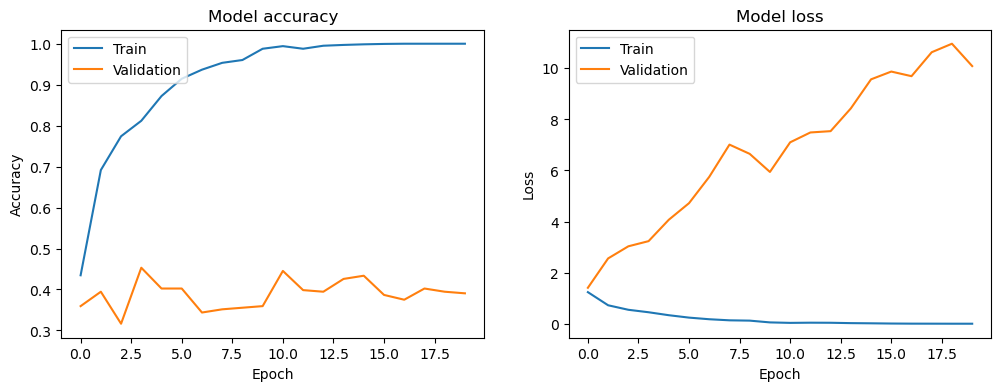

4/4 [==============================] - 1s 125ms/step - loss: 10.6582 - accuracy: 0.3633
Test accuracy: 0.36328125


In [15]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2>Model C.2</h2>

<p>SKinut još jedan sloj (64) - broj parametara smanjen na malo manje od 3 700 000</p>

In [30]:
# CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        MaxPooling2D((2, 2)),
        MaxPooling2D((2, 2)),
        
        
        
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 7200)              0         
                                                      

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:20</p>
<p>veličina batcheva: 64</p>

In [20]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/20
32/32 [==============================] - 11s 247ms/step - loss: 1.2831 - accuracy: 0.4062 - val_loss: 1.4066 - val_accuracy: 0.2500
Epoch 2/20
32/32 [==============================] - 7s 228ms/step - loss: 0.8081 - accuracy: 0.6596 - val_loss: 1.9066 - val_accuracy: 0.2148
Epoch 3/20
32/32 [==============================] - 8s 230ms/step - loss: 0.6637 - accuracy: 0.7304 - val_loss: 2.4241 - val_accuracy: 0.2773
Epoch 4/20
32/32 [==============================] - 7s 228ms/step - loss: 0.5601 - accuracy: 0.7750 - val_loss: 2.4787 - val_accuracy: 0.3750
Epoch 5/20
32/32 [==============================] - 7s 226ms/step - loss: 0.4798 - accuracy: 0.8149 - val_loss: 2.8411 - val_accuracy: 0.3750
Epoch 6/20
32/32 [==============================] - 7s 228ms/step - loss: 0.4658 - accuracy: 0.8114 - val_loss: 3.2332 - val_accuracy: 0.3555
Epoch 7/20
32/32 [==============================] - 7s 227ms/step - loss: 0.3703 - accuracy: 0.8620 - val_loss: 3.5642 - val_accuracy: 0.3516
Epoch

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela C.2:</p>

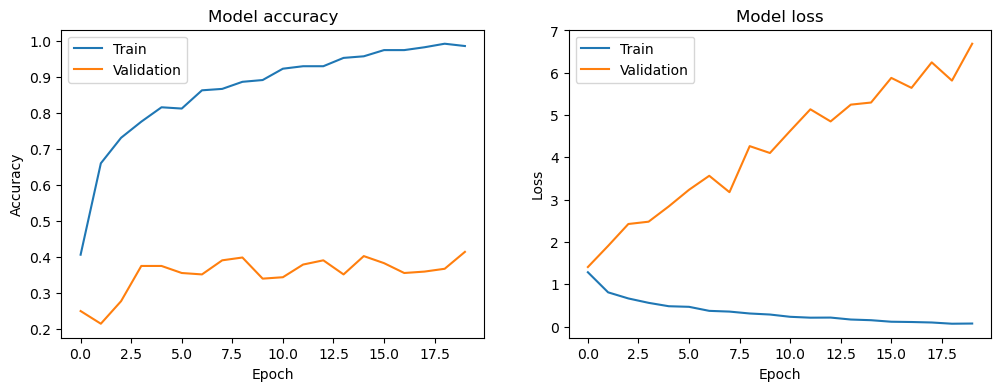

4/4 [==============================] - 1s 125ms/step - loss: 6.5586 - accuracy: 0.4219
Test accuracy: 0.421875


In [22]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel C.3</h2>
<p>ponavljanje modela C.1 u 50 epoha</p>

In [27]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50
32/32 [==============================] - 17s 431ms/step - loss: 1.1463 - accuracy: 0.4435 - val_loss: 1.4977 - val_accuracy: 0.4414
Epoch 2/50
32/32 [==============================] - 13s 395ms/step - loss: 0.7130 - accuracy: 0.6970 - val_loss: 2.6456 - val_accuracy: 0.2852
Epoch 3/50
32/32 [==============================] - 13s 393ms/step - loss: 0.5844 - accuracy: 0.7461 - val_loss: 2.9178 - val_accuracy: 0.3438
Epoch 4/50
32/32 [==============================] - 13s 396ms/step - loss: 0.4395 - accuracy: 0.8158 - val_loss: 3.2622 - val_accuracy: 0.3359
Epoch 5/50
32/32 [==============================] - 13s 394ms/step - loss: 0.3505 - accuracy: 0.8654 - val_loss: 3.4314 - val_accuracy: 0.2930
Epoch 6/50
32/32 [==============================] - 13s 394ms/step - loss: 0.2633 - accuracy: 0.9047 - val_loss: 4.9997 - val_accuracy: 0.4648
Epoch 7/50
32/32 [==============================] - 13s 393ms/step - loss: 0.1846 - accuracy: 0.9337 - val_loss: 5.3805 - val_accuracy: 0.3711

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela C.2:</p>

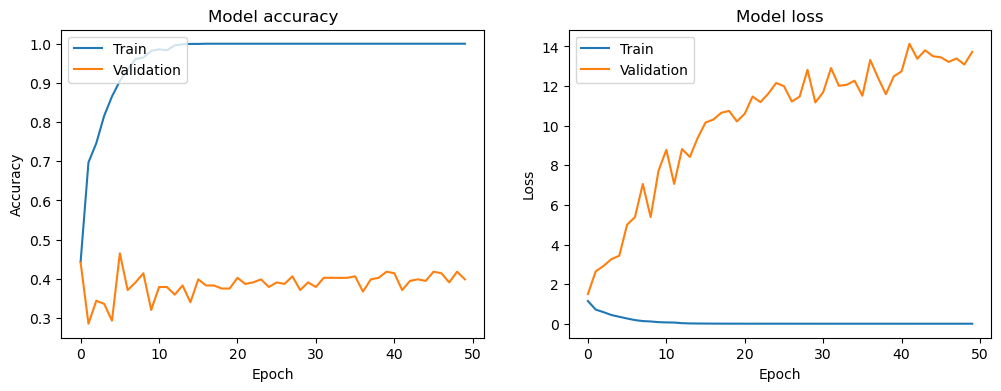

4/4 [==============================] - 1s 137ms/step - loss: 13.3536 - accuracy: 0.3789
Test accuracy: 0.37890625


In [28]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel C.4</h2>
<p>ponavljanje modela C.2 u 50 epoha</p>

In [31]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50
32/32 [==============================] - 11s 247ms/step - loss: 1.4064 - accuracy: 0.3969 - val_loss: 1.2426 - val_accuracy: 0.3750
Epoch 2/50
32/32 [==============================] - 7s 229ms/step - loss: 0.8747 - accuracy: 0.5982 - val_loss: 1.3764 - val_accuracy: 0.2969
Epoch 3/50
32/32 [==============================] - 7s 228ms/step - loss: 0.7532 - accuracy: 0.6783 - val_loss: 1.6263 - val_accuracy: 0.3203
Epoch 4/50
32/32 [==============================] - 7s 228ms/step - loss: 0.6493 - accuracy: 0.7402 - val_loss: 1.7293 - val_accuracy: 0.3047
Epoch 5/50
32/32 [==============================] - 8s 231ms/step - loss: 0.5947 - accuracy: 0.7667 - val_loss: 2.0319 - val_accuracy: 0.3359
Epoch 6/50
32/32 [==============================] - 7s 230ms/step - loss: 0.5596 - accuracy: 0.7808 - val_loss: 2.0151 - val_accuracy: 0.3008
Epoch 7/50
32/32 [==============================] - 7s 227ms/step - loss: 0.5221 - accuracy: 0.7952 - val_loss: 2.2898 - val_accuracy: 0.3555
Epoch

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela C.4:</p>

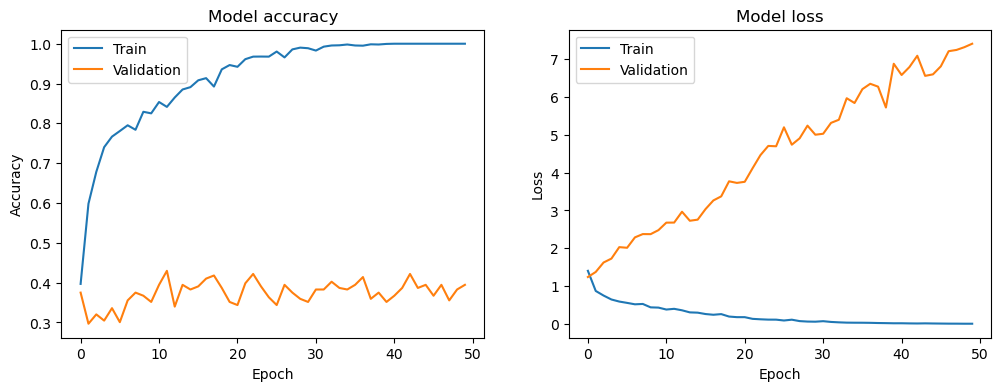

4/4 [==============================] - 1s 180ms/step - loss: 7.1886 - accuracy: 0.3906
Test accuracy: 0.390625


In [32]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2>Zaključak:</h2>
<p>Iako je model i dalje overfitted, smanjenjem broja parametara usporeno je dostizanje 100% točnosti na treningu</p>